![Doordash](https://raw.githubusercontent.com/interviewquery/takehomes/doordash_1/doordash_1/logo.png)
# Overview

In this exercise, you will use your machine learning experience to solve
a straightforward but challenging prediction​ ​problem.​ ​The​ ​exercise​
​contains two​​ parts​

1. Building​ ​a​ ​machine​ ​learning​ model​ ​ ​for​ ​a​ ​prediction ​ task​
2. Writing ​ an​ ​ application​ ​ to​ ​ make​ ​ ​predictions ​ using​ ​ ​that​ ​model.

In Part 1, we would love to have you exhibit your modeling skills. You
will be evaluated on the following - performance on the test set,
feature engineering choices including features used and encoding of
features, data processing, choice of models used, description of model
performance and insights and observations from the​ ​model.

Part 2 is your chance to show off your software engineering skills. This
includes performance of the application, adherence to common software
engineering patterns (unit tests, modular code, etc.) and ability to
make educated​ ​trade-offs​ ​based​ ​on​ ​the​ ​given ​ constraints.​

**NOTE:** For​ this part, you must use a production ready language like
Python. Thus, please do not use R.

# Problem ​Description

When​ a​ ​consumer​ ​places​ ​an​ ​order​ ​on​ DoorDash,​​ we​ ​ show​ ​ the​ ​ ​expected ​
​time of​​ ​delivery.​ ​It​ ​is​ ​very ​important​ ​for​ DoorDash to get this right, as it has a big impact on consumer experience. In this exercise, you will build a model to predict the
estimated time taken for a delivery and write an application that can
make these predictions.

Concretely, for a given delivery you must predict the ​**total delivery
duration seconds** , i.e., the time taken from

- Start:​ ​the​ ​time​ ​consumer​ ​submits​ ​the​ ​order ​ (​`created_at`) ​ to​
- End:​ ​when​ ​the​ ​order​ ​will​ ​be​ ​delivered​ to​ ​ ​the​ consumer​​
​(`actual_delivery_time`).

To​ ​help​ ​with​ ​this,​ ​we​ ​have​ ​provided

-   `historical_data.csv`:​ ​table​ ​of​ ​historical​ ​deliveries

-   `data_to_predict.json`: ​ ​Json​ ​list​ ​of​ ​deliveries​ ​that​ ​you​ ​must​
    ​predict​ ​on​ ​(for ​​the​ ​second​ ​part)

-   `data_description.txt`:​ ​ description​ ​ of​ ​ all​ ​ columns​ ​ in​​ `historical_data.csv`​ ​and​ ​details​ of​ `data_to_predict.json`

# Requirements

## Part ​ 1​

-   Build a model to predict the total delivery duration seconds (as
    defined above). Feel free to generate additional​ ​features​ ​from​ ​the ​ given​ ​ data​ ​ to​ ​ improve​ ​ model​ ​performance.​
-   Explain a) model(s) used, b) how you evaluated your model
    performance on the historical data, c) any data processing you
    performed on the data, d) feature engineering choices you made
    and e) other information​ ​you​ ​would​ ​like​ ​us​ ​to​ ​know​ ​about​ ​your​
    ​modeling​ ​approach.
-   Based ​ on​ ​ the​ ​ ​findings ​​from​ ​the​ ​model,​ list​​ ​recommendations​ to​​
    ​reduce​ ​delivery​ ​time

### Deliverables

-   Submit one document that includes a write-up explaining your model,
    choices made and discussion on the​ ​questions ​ above.​
-   Submit​ ​the​ ​code​ ​used​ ​for​ ​this​ ​part

## Part ​ 2​
-   Write an application that accepts data from the json file
    (`data_to_predict.json`), uses the model to make a prediction for each
    delivery in the json file and writes out predictions to a new ​*tab separated file* (`tsv`) with​ ​columns​ ​-​ ​`delivery_id`, ​`predicted_delivery_seconds`

-   Your predictions on this test data set will be evaluated using RMSE
    (Root Mean Squared Error) and your ​ score​ ​ must​ ​ exceed​ ​ a​ ​ baseline​
    ​ set​ ​ for​ ​ the​ ​ ​task.

### Deliverables

-   Code that ​​outputs a​ ​`tsv`​ ​file​ ​that​ ​gives ​the​​ ​prediction​ ​for​ ​the​
     `data_to_predict.json` data.​ This application (that makes
    predictions) must be runnable from the command line with
    `data_to_predict.json` passed as input. Include instructions for
    running the code (dependencies,​ ​packages​ ​required,​ ​etc.)

# Notes

We expect the exercise to take 5-6 hours in total, but feel free to
spend as much time as you like on it. Feel free to​ ​use​ ​any​ ​open​ ​source​
​packages​ ​for​ ​the​ ​task.

**Thank**​ ​**you**​ ​**for**​ ​**your**​ ​**hard**​ ​**work!**​ ​**Please**​ ​**let**​
​**us**​ ​**know**​ ​**if**​ ​**you**​ ​**have**​ ​**any**​ ​**questions.**​ ​**Good**​
​**luck!**


In [1]:
# !git clone --branch https://github.com/interviewquery/takehomes.git
# %cd takehomes/doordash_1
# !ls

In [2]:
!ls

data           doordash.ipynb


In [3]:
!cat data/data_description.txt

#### Data description #### 
The attached file `historical_data.csv` contains a subset of deliveries received at DoorDash in early 2015 in a subset of the cities. Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below. Note all money (dollar) values given in the data are in cents and all time duration values given are in seconds 
The target value to predict here is the total seconds value between `created_at` and `actual_delivery_time`. 

We have added noise to the dataset to obfuscate certain business details. Both `historical_data.csv` and `data_to_predict.json` include similar noise. We will only be evaluating your model's performance on this noisy, artificial dataset. The baseline model we will compare it was also trained and evaluated on the same noisy dataset.

#### Columns in historical_data.csv

### Time features
market_id: A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id
created_at

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file_path = 'data/historical_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
print("Top 5 rows of the DataFrame:")
print(df.head())

Top 5 rows of the DataFrame:
   market_id           created_at actual_delivery_time  store_id  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [7]:
# List of columns to convert to object type
columns_to_convert = ['market_id', 'store_id', 'order_protocol']  # Replace with your actual column names

# Convert specified columns to object type
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [8]:

# Calculate null and non-null counts for each column
null_counts = df.isnull().sum()
not_null_counts = df.notnull().sum()

# Create a summary DataFrame
summary_df = pd.DataFrame({
#     'Column': df.columns,
    'Null Count': null_counts,
    'Not Null Count': not_null_counts
})

# Display the summary DataFrame
print(summary_df)

                                              Null Count  Not Null Count
market_id                                            987          196441
created_at                                             0          197428
actual_delivery_time                                   7          197421
store_id                                               0          197428
store_primary_category                              4760          192668
order_protocol                                       995          196433
total_items                                            0          197428
subtotal                                               0          197428
num_distinct_items                                     0          197428
min_item_price                                         0          197428
max_item_price                                         0          197428
total_onshift_dashers                              16262          181166
total_busy_dashers                                 

In [9]:
# Removing rows that do not have 'actual_delivery_time' (7)
# Specify the column with NaNs
column_name = 'actual_delivery_time'

# Identify rows with NaN values in the specified column
nan_rows = df[df[column_name].isnull()]

# Display information about the DataFrame with NaN values
print(f"Total number of rows with NaNs in '{column_name}': {len(nan_rows)}")

# Removing these from the dataframe 
df = df.dropna(subset=['actual_delivery_time'])

# Regenerating the null and non-null summary
# Calculate null and non-null counts for each column
null_counts = df.isnull().sum()
not_null_counts = df.notnull().sum()

# Create a summary DataFrame
summary_df = pd.DataFrame({
#     'Column': df.columns,
    'Null Count': null_counts,
    'Not Null Count': not_null_counts
})

# Display the summary DataFrame
print(summary_df)


Total number of rows with NaNs in 'actual_delivery_time': 7
                                              Null Count  Not Null Count
market_id                                            987          196434
created_at                                             0          197421
actual_delivery_time                                   0          197421
store_id                                               0          197421
store_primary_category                              4760          192661
order_protocol                                       995          196426
total_items                                            0          197421
subtotal                                               0          197421
num_distinct_items                                     0          197421
min_item_price                                         0          197421
max_item_price                                         0          197421
total_onshift_dashers                              16262        

In [10]:
# Creating the dependent variable of interest
# Convert the object columns to datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Calculate the duration in minutes and create a new column
df['duration_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Round the 'duration_minutes' column to 2 decimal places
df['duration_minutes'] = df['duration_minutes'].round(2)



In [11]:


# List of columns to convert from cents to dollars
cents_columns = ['subtotal', 'min_item_price', 'max_item_price']  # Replace with your actual column names

# List of columns to convert from seconds to minutes
seconds_columns = ['estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration']  # Replace with your actual column names

# Convert columns from cents to dollars and insert them right after the original columns
for column in cents_columns:
    if column in df.columns:
        df.insert(df.columns.get_loc(column) + 1, column + '_dollars', df[column] / 100)  # Assuming 1 dollar = 100 cents
        df.drop(column, axis=1)
# Convert columns from seconds to minutes and insert them right after the original columns
for column in seconds_columns:
    if column in df.columns:
        df.insert(df.columns.get_loc(column) + 1, column + '_minutes', df[column] / 60)  # Assuming 1 minute = 60 seconds
        df.drop(column, axis=1)

# Convert 'created_at' column to datetime format if it's not already in that format
df['created_at'] = pd.to_datetime(df['created_at'])

# Create 'date' and 'hour' columns
df['date_created'] = df['created_at'].dt.date
df['hour_created'] = df['created_at'].dt.hour

# Create 'date' and 'hour' columns
df['date_delivered'] = df['actual_delivery_time'].dt.date
df['hour_delivered'] = df['actual_delivery_time'].dt.hour


In [12]:
# Display summary statistics for numerical columns
numerical_summary = df.describe()

# Select only categorical columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

# Describe only the categorical columns
categorical_description = df[categorical_columns].describe()


# Print the results
print("Summary statistics for numerical columns:")
print(numerical_summary)

print("\nSummary statistics for Categorical columns:")
print(categorical_description)

Summary statistics for numerical columns:
         total_items       subtotal  subtotal_dollars  num_distinct_items  \
count  197421.000000  197421.000000     197421.000000       197421.000000   
mean        3.196367    2682.326379         26.823264            2.670780   
std         2.666552    1823.106256         18.231063            1.630261   
min         1.000000       0.000000          0.000000            1.000000   
25%         2.000000    1400.000000         14.000000            1.000000   
50%         3.000000    2200.000000         22.000000            2.000000   
75%         4.000000    3395.000000         33.950000            3.000000   
max       411.000000   27100.000000        271.000000           20.000000   

       min_item_price  min_item_price_dollars  max_item_price  \
count   197421.000000           197421.000000   197421.000000   
mean       686.224596                6.862246     1159.590444   
std        522.044061                5.220441      558.416236   
min 

/var/folders/yn/xgk1r_px4gn9cvgfmm0fwn6w0000gn/T/ipykernel_7347/1099999715.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  categorical_description = df[categorical_columns].describe()
/var/folders/yn/xgk1r_px4gn9cvgfmm0fwn6w0000gn/T/ipykernel_7347/1099999715.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  categorical_description = df[categorical_columns].describe()


In [13]:

# Convert 'created_at' column to a datetime format if it's not already in that format
df['created_at'] = pd.to_datetime(df['created_at'])

# Group by date and count the number of rows for each date
date_counts = df.groupby(df['created_at'].dt.date).size().reset_index(name='row_count')

# Sort the DataFrame by date
date_counts = date_counts.sort_values(by='created_at')
print(date_counts)

    created_at  row_count
0   2014-10-19          1
1   2015-01-21       2088
2   2015-01-22       6001
3   2015-01-23       6611
4   2015-01-24       8230
5   2015-01-25       7934
6   2015-01-26       5478
7   2015-01-27       5524
8   2015-01-28       5669
9   2015-01-29       6038
10  2015-01-30       6763
11  2015-01-31       8146
12  2015-02-01       7722
13  2015-02-02       6715
14  2015-02-03       6369
15  2015-02-04       6113
16  2015-02-05       6850
17  2015-02-06       7118
18  2015-02-07       9149
19  2015-02-08       8873
20  2015-02-09       7278
21  2015-02-10       6090
22  2015-02-11       6403
23  2015-02-12       6784
24  2015-02-13       7383
25  2015-02-14       9016
26  2015-02-15       9085
27  2015-02-16       7931
28  2015-02-17       6078
29  2015-02-18       3981


In [14]:
data_for_date = df[df['created_at'].dt.date == pd.to_datetime('2014-10-19').date()]

# Display the data for '2014-10-15'
print(data_for_date)

     market_id          created_at actual_delivery_time store_id  \
2690       1.0 2014-10-19 05:24:15  2015-01-25 19:11:54     3560   

     store_primary_category order_protocol  total_items  subtotal  \
2690                italian            1.0            1      1695   

      subtotal_dollars  num_distinct_items  ...  total_outstanding_orders  \
2690             16.95                   1  ...                       NaN   

      estimated_order_place_duration  estimated_order_place_duration_minutes  \
2690                             446                                7.433333   

      estimated_store_to_consumer_driving_duration  \
2690                                         412.0   

      estimated_store_to_consumer_driving_duration_minutes  duration_minutes  \
2690                                           6.866667            141947.65   

      date_created  hour_created  date_delivered  hour_delivered  
2690    2014-10-19             5      2015-01-25              19  

[1 

In [15]:
# Seems like spurious data
date_to_remove = pd.to_datetime('2014-10-19')

# Filter the DataFrame to exclude rows for the specified date
df_filtered = df[df['created_at'].dt.date != date_to_remove.date()]

df = df_filtered

# Group by date and count the number of rows for each date
date_counts = df.groupby(df['created_at'].dt.date).size().reset_index(name='row_count')

# Sort the DataFrame by date
date_counts = date_counts.sort_values(by='created_at')
print(date_counts)


    created_at  row_count
0   2015-01-21       2088
1   2015-01-22       6001
2   2015-01-23       6611
3   2015-01-24       8230
4   2015-01-25       7934
5   2015-01-26       5478
6   2015-01-27       5524
7   2015-01-28       5669
8   2015-01-29       6038
9   2015-01-30       6763
10  2015-01-31       8146
11  2015-02-01       7722
12  2015-02-02       6715
13  2015-02-03       6369
14  2015-02-04       6113
15  2015-02-05       6850
16  2015-02-06       7118
17  2015-02-07       9149
18  2015-02-08       8873
19  2015-02-09       7278
20  2015-02-10       6090
21  2015-02-11       6403
22  2015-02-12       6784
23  2015-02-13       7383
24  2015-02-14       9016
25  2015-02-15       9085
26  2015-02-16       7931
27  2015-02-17       6078
28  2015-02-18       3981


In [16]:
# Display summary statistics for numerical columns
numerical_summary = df.describe()

# Select only categorical columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

# Describe only the categorical columns
categorical_description = df[categorical_columns].describe()


# Print the results
print("Summary statistics for numerical columns:")
print(numerical_summary)

print("\nSummary statistics for Categorical columns:")
print(categorical_description)

Summary statistics for numerical columns:
         total_items       subtotal  subtotal_dollars  num_distinct_items  \
count  197420.000000  197420.000000     197420.000000       197420.000000   
mean        3.196378    2682.331380         26.823314            2.670788   
std         2.666554    1823.109519         18.231095            1.630261   
min         1.000000       0.000000          0.000000            1.000000   
25%         2.000000    1400.000000         14.000000            1.000000   
50%         3.000000    2200.000000         22.000000            2.000000   
75%         4.000000    3395.000000         33.950000            3.000000   
max       411.000000   27100.000000        271.000000           20.000000   

       min_item_price  min_item_price_dollars  max_item_price  \
count   197420.000000           197420.000000   197420.000000   
mean       686.219993                6.862200     1159.588238   
std        522.041376                5.220414      558.416791   
min 

/var/folders/yn/xgk1r_px4gn9cvgfmm0fwn6w0000gn/T/ipykernel_7347/1099999715.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  categorical_description = df[categorical_columns].describe()
/var/folders/yn/xgk1r_px4gn9cvgfmm0fwn6w0000gn/T/ipykernel_7347/1099999715.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  categorical_description = df[categorical_columns].describe()


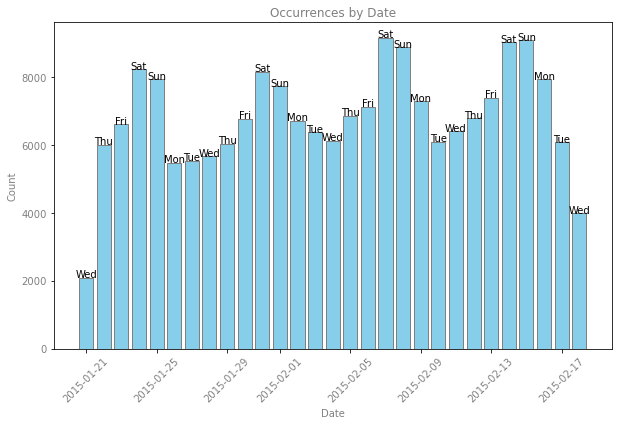

In [17]:


# Convert 'created_at' column to a datetime format if it's not already in that format
df['created_at'] = pd.to_datetime(df['created_at'])

# Count occurrences by date
date_counts = df['created_at'].dt.date.value_counts().reset_index()
date_counts.columns = ['date', 'count']

# Add a 'day_of_week' column
date_counts['day_of_week'] = date_counts['date'].apply(lambda x: x.strftime('%a'))

# Sort the DataFrame by date
date_counts = date_counts.sort_values(by='date')

# Plot a bar chart with day of the week data labels
plt.figure(figsize=(10, 6))
bars = plt.bar(date_counts['date'], date_counts['count'], color='skyblue')

# Add day of the week as data labels
for bar, day_of_week in zip(bars, date_counts['day_of_week']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, day_of_week, ha='center', color='black')

# Set the title and axis labels with gray color
plt.title('Occurrences by Date', color='grey')
plt.xlabel('Date', color='grey')
plt.ylabel('Count', color='grey')
plt.xticks(rotation=45, color='grey')

# Set the color of the tick labels to gray
plt.yticks(color='grey')

# Set the color of the bar edges to gray
for bar in bars:
    bar.set_edgecolor('grey')

plt.show()


In [18]:
# Convert 'created_at' column to a datetime format if it's not already in that format
df['created_at'] = pd.to_datetime(df['created_at'])

# Count occurrences by hour
hourly_counts = df['created_at'].dt.hour.value_counts().sort_index().reset_index()
hourly_counts.columns = ['hour', 'count']

# Sort the DataFrame by hour
hourly_counts = hourly_counts.sort_values(by='hour')

print(hourly_counts)

    hour  count
0      0  12669
1      1  28187
2      2  36973
3      3  27068
4      4  15250
5      5   7095
6      6   1416
7      7     11
8      8      2
9     14     40
10    15    538
11    16   2109
12    17   3413
13    18   5100
14    19  13541
15    20  15560
16    21  11464
17    22   8821
18    23   8163


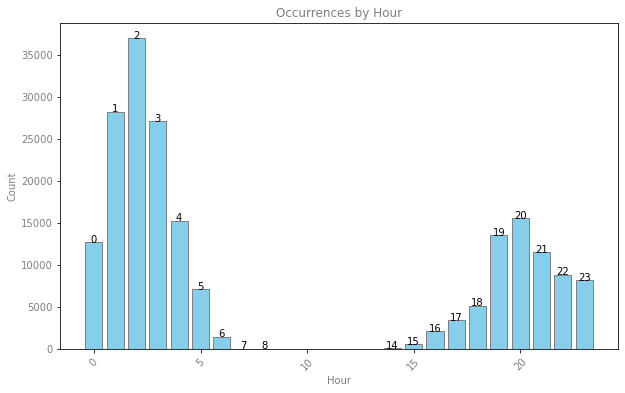

In [19]:

# Plot a bar chart with hour data labels
plt.figure(figsize=(10, 6))
bars = plt.bar(hourly_counts['hour'], hourly_counts['count'], color='skyblue')

# Add hour as data labels
for bar, hour in zip(bars, hourly_counts['hour']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(hour), ha='center', color='black')

# Set the title and axis labels with gray color
plt.title('Occurrences by Hour', color='grey')
plt.xlabel('Hour', color='grey')
plt.ylabel('Count', color='grey')
plt.xticks(rotation=45, color='grey')

# Set the color of the tick labels to gray
plt.yticks(color='grey')

# Set the color of the bar edges to gray
for bar in bars:
    bar.set_edgecolor('grey')

plt.show()


In [20]:
# Spread of duration_minutes
numerical_summary = df['duration_minutes'].describe()

# Print the results
print("Summary statistics for numerical columns:")
print(numerical_summary)


Summary statistics for numerical columns:
count    197420.000000
mean         47.752181
std          26.888107
min           1.680000
25%          35.070000
50%          44.330000
75%          56.350000
max        6231.320000
Name: duration_minutes, dtype: float64


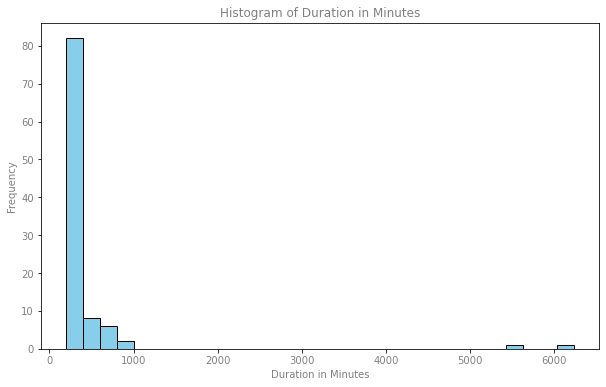

In [21]:
# Sounds crazy... what are these values?
# Plot a histogram for the 'duration_minutes' 

# Define a threshold for outliers (you can adjust this as needed)
duration_threshold = 200  # Adjust the threshold value

# Retrieve rows where 'duration_in_minutes' is greater than the threshold
outlier_rows = df[df['duration_minutes'] > duration_threshold]


plt.figure(figsize=(10, 6))
plt.hist(outlier_rows['duration_minutes'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Duration in Minutes', color='gray')
plt.xlabel('Duration in Minutes', color='gray')
plt.ylabel('Frequency', color='gray')
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.show()


In [22]:
# Retrieve rows where 'duration_minutes' is greater than 4000
duration_greater_than_4000 = df[df['duration_minutes'] > 4000]

# Display the retrieved rows
print(duration_greater_than_4000)

       market_id          created_at actual_delivery_time store_id  \
27189        1.0 2015-02-16 02:24:09  2015-02-19 22:45:31     4338   
185550       4.0 2015-01-28 08:34:06  2015-02-01 16:25:25     6503   

       store_primary_category order_protocol  total_items  subtotal  \
27189                  indian            3.0            4      4980   
185550                dessert            5.0            3      1520   

        subtotal_dollars  num_distinct_items  ...  total_outstanding_orders  \
27189               49.8                   4  ...                     104.0   
185550              15.2                   3  ...                       0.0   

        estimated_order_place_duration  \
27189                              251   
185550                             251   

        estimated_order_place_duration_minutes  \
27189                                 4.183333   
185550                                4.183333   

        estimated_store_to_consumer_driving_duration  \
271

Summary statistics for numerical columns:
count    197418.000000
mean         47.693031
std          19.401459
min           1.680000
25%          35.070000
50%          44.330000
75%          56.350000
max         950.530000
Name: duration_minutes, dtype: float64


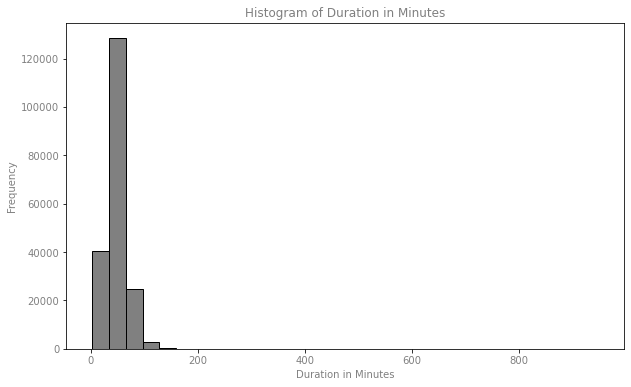

In [23]:
# Remove rows where 'duration_minutes' is greater than 4000
df = df[df['duration_minutes'] <= 4000]

# Check spread and plot out updated dataframe
numerical_summary = df['duration_minutes'].describe()

# Print the results
print("Summary statistics for numerical columns:")
print(numerical_summary)


# Regenerate that histogram
plt.figure(figsize=(10, 6))
plt.hist(df['duration_minutes'], bins=30, color='gray', edgecolor='black')
plt.title('Histogram of Duration in Minutes', color='gray')
plt.xlabel('Duration in Minutes', color='gray')
plt.ylabel('Frequency', color='gray')
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.show()


Summary statistics for numerical columns:
count     98.000000
mean     315.156224
std      155.189401
min      200.530000
25%      223.465000
50%      251.990000
75%      333.420000
max      950.530000
Name: duration_minutes, dtype: float64


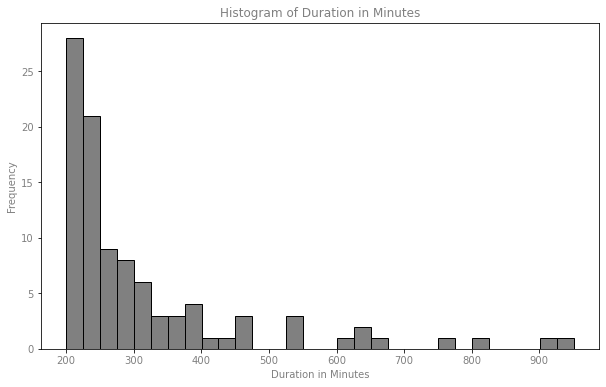

In [24]:

# Plot a histogram for the 'duration_minutes' where the outliers are greater than 200

# Define a threshold for outliers (you can adjust this as needed)
duration_threshold = 200  # Adjust the threshold value

# Retrieve rows where 'duration_in_minutes' is greater than the threshold
outlier_rows = df[df['duration_minutes'] > duration_threshold]

# Spread of duration_minutes
numerical_summary = outlier_rows['duration_minutes'].describe()

# Print the results
print("Summary statistics for numerical columns:")
print(numerical_summary)


plt.figure(figsize=(10, 6))
plt.hist(outlier_rows['duration_minutes'], bins=30, color='gray', edgecolor='black')
plt.title('Histogram of Duration in Minutes', color='gray')
plt.xlabel('Duration in Minutes', color='gray')
plt.ylabel('Frequency', color='gray')
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.show()

In [25]:
# Display summary statistics for numerical columns
numerical_summary = outlier_rows.describe()

# Select only categorical columns
categorical_columns = outlier_rows.select_dtypes(exclude=['number']).columns

# Describe only the categorical columns
categorical_description = outlier_rows[categorical_columns].describe()


# Print the results
print("Summary statistics for numerical columns:")
print(numerical_summary)

print("\nSummary statistics for Categorical columns:")
print(categorical_description)

Summary statistics for numerical columns:
       total_items     subtotal  subtotal_dollars  num_distinct_items  \
count    98.000000    98.000000         98.000000           98.000000   
mean      2.938776  2576.969388         25.769694            2.510204   
std       2.401959  1893.013865         18.930139            1.748312   
min       1.000000   400.000000          4.000000            1.000000   
25%       1.000000  1217.000000         12.170000            1.000000   
50%       2.000000  2100.000000         21.000000            2.000000   
75%       3.000000  3336.000000         33.360000            3.000000   
max      13.000000  9400.000000         94.000000           11.000000   

       min_item_price  min_item_price_dollars  max_item_price  \
count       98.000000               98.000000       98.000000   
mean       807.479592                8.074796     1211.357143   
std        902.808336                9.028083      846.382871   
min         50.000000                0.5

/var/folders/yn/xgk1r_px4gn9cvgfmm0fwn6w0000gn/T/ipykernel_7347/1411627547.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  categorical_description = outlier_rows[categorical_columns].describe()
/var/folders/yn/xgk1r_px4gn9cvgfmm0fwn6w0000gn/T/ipykernel_7347/1411627547.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  categorical_description = outlier_rows[categorical_columns].describe()


In [26]:
# Sort outlier_rows by 'created_at'
outlier_rows = outlier_rows.sort_values(by='created_at')

# Display the sorted DataFrame
print(outlier_rows)

       market_id          created_at actual_delivery_time store_id  \
139989       3.0 2015-01-21 20:56:51  2015-01-22 07:00:07     6580   
10362        1.0 2015-01-21 23:56:02  2015-01-22 04:02:20     2922   
192550       2.0 2015-01-23 01:28:24  2015-01-23 05:47:48     1722   
44254        6.0 2015-01-23 20:38:35  2015-01-24 02:37:31     1234   
63505        2.0 2015-01-24 08:19:17  2015-01-24 17:24:07      441   
...          ...                 ...                  ...      ...   
58374        3.0 2015-02-16 03:12:34  2015-02-16 08:10:16     4294   
76728        1.0 2015-02-16 19:30:49  2015-02-17 01:49:46     3247   
155209       6.0 2015-02-17 01:13:48  2015-02-17 04:34:32     4360   
179456       6.0 2015-02-17 03:09:45  2015-02-17 06:57:41     1779   
109374       1.0 2015-02-18 02:28:28  2015-02-18 06:31:04     4960   

       store_primary_category order_protocol  total_items  subtotal  \
139989          mediterranean            3.0            2      2300   
10362            

In [27]:

# Filter rows where 'created_at' is equal to '2015-02-12'
selected_rows = outlier_rows[outlier_rows['created_at'].dt.date == pd.to_datetime('2015-02-12').date()]


# Display the selected rows
selected_rows.sort_values(by='actual_delivery_time')


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,subtotal_dollars,num_distinct_items,...,total_outstanding_orders,estimated_order_place_duration,estimated_order_place_duration_minutes,estimated_store_to_consumer_driving_duration,estimated_store_to_consumer_driving_duration_minutes,duration_minutes,date_created,hour_created,date_delivered,hour_delivered
97736,2.0,2015-02-12 00:00:23,2015-02-12 04:39:05,3926,middle-eastern,3.0,2,1945,19.45,2,...,15.0,251,4.183333,597.0,9.950000,278.70,2015-02-12,0,2015-02-12,4
63508,2.0,2015-02-12 01:43:01,2015-02-12 05:06:03,441,american,5.0,2,2190,21.90,2,...,112.0,251,4.183333,598.0,9.966667,203.03,2015-02-12,1,2015-02-12,5
182592,5.0,2015-02-12 00:36:10,2015-02-12 06:58:02,5117,smoothie,4.0,1,580,5.80,1,...,10.0,251,4.183333,916.0,15.266667,381.87,2015-02-12,0,2015-02-12,6
50677,2.0,2015-02-12 02:16:16,2015-02-12 06:58:30,3458,NaN,1.0,2,1350,13.50,2,...,145.0,446,7.433333,424.0,7.066667,282.23,2015-02-12,2,2015-02-12,6
38552,2.0,2015-02-12 03:24:56,2015-02-12 07:00:03,1925,indian,2.0,2,2190,21.90,1,...,116.0,251,4.183333,630.0,10.500000,215.12,2015-02-12,3,2015-02-12,7
80009,5.0,2015-02-12 02:14:49,2015-02-12 07:00:35,577,afghan,3.0,3,4197,41.97,3,...,13.0,251,4.183333,829.0,13.816667,285.77,2015-02-12,2,2015-02-12,7
80898,2.0,2015-02-12 01:59:39,2015-02-12 07:00:37,6904,american,2.0,3,3780,37.80,3,...,127.0,251,4.183333,852.0,14.200000,300.97,2015-02-12,1,2015-02-12,7
13460,1.0,2015-02-12 01:22:49,2015-02-12 07:01:31,2454,pizza,5.0,3,1593,15.93,2,...,47.0,251,4.183333,591.0,9.850000,338.70,2015-02-12,1,2015-02-12,7
84663,6.0,2015-02-12 02:39:19,2015-02-12 07:05:33,1362,pizza,2.0,1,2600,26.00,1,...,NaN,251,4.183333,408.0,6.800000,266.23,2015-02-12,2,2015-02-12,7
189463,1.0,2015-02-12 03:21:37,2015-02-12 07:05:43,4820,asian,3.0,1,925,9.25,1,...,58.0,251,4.183333,527.0,8.783333,224.10,2015-02-12,3,2015-02-12,7


In [28]:
# Remove rows where 'duration_minutes' is greater than 200
df = df[df['duration_minutes'] <= 200]
# Display summary statistics for numerical columns
numerical_summary = df.describe()

# Select only categorical columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

# Describe only the categorical columns
categorical_description = df[categorical_columns].describe()


# Print the results
print("Summary statistics for numerical columns:")
print(numerical_summary)

print("\nSummary statistics for Categorical columns:")
print(categorical_description)

Summary statistics for numerical columns:
         total_items       subtotal  subtotal_dollars  num_distinct_items  \
count  197320.000000  197320.000000     197320.000000       197320.000000   
mean        3.196503    2682.377955         26.823780            2.670860   
std         2.666691    1823.077627         18.230776            1.630206   
min         1.000000       0.000000          0.000000            1.000000   
25%         2.000000    1400.000000         14.000000            1.000000   
50%         3.000000    2200.000000         22.000000            2.000000   
75%         4.000000    3395.000000         33.950000            3.000000   
max       411.000000   27100.000000        271.000000           20.000000   

       min_item_price  min_item_price_dollars  max_item_price  \
count   197320.000000           197320.000000   197320.000000   
mean       686.160567                6.861606     1159.561383   
std        521.781320                5.217813      558.239160   
min 

/var/folders/yn/xgk1r_px4gn9cvgfmm0fwn6w0000gn/T/ipykernel_7347/1786337498.py:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  categorical_description = df[categorical_columns].describe()
/var/folders/yn/xgk1r_px4gn9cvgfmm0fwn6w0000gn/T/ipykernel_7347/1786337498.py:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  categorical_description = df[categorical_columns].describe()


In [29]:


# Group by 'total_items' and calculate count, mean for 'subtotal' and mean for 'duration_minutes'
aggregated_df = df.groupby('total_items').agg(
    count=('subtotal', 'size'),
    mean_subtotal=('subtotal', 'mean'),
    mean_duration_minutes=('duration_minutes', 'mean')
).reset_index()

aggregated_df = aggregated_df.sort_values(by='total_items')
# Display the aggregated DataFrame
print(aggregated_df)

    total_items  count  mean_subtotal  mean_duration_minutes
0             1  40590    1342.320399              44.500472
1             2  55107    2010.025568              46.134873
2             3  39228    2689.160778              47.706798
3             4  25125    3298.056000              49.065247
4             5  14051    3942.902000              50.162892
5             6   8618    4413.121258              51.366823
6             7   5021    4925.285600              52.435863
7             8   3048    5552.949147              53.194144
8             9   1858    5873.244887              54.190802
9            10   1283    6330.965705              55.540803
10           11    832    6461.796875              55.791575
11           12    674    6814.734421              56.437507
12           13    403    6587.568238              56.133226
13           14    328    6544.810976              54.546829
14           15    226    6813.088496              55.793142
15           16    186  

In [30]:
# Calculate the 99th percentile value
percentile_99 = df['total_items'].quantile(0.995)

# Print the result
print(f"The 99th percentile value of total_items is: {percentile_99}")

The 99th percentile value of total_items is: 15.0


In [31]:

from scipy.stats import percentileofscore

# Assuming 'df' is your DataFrame
# If not, replace 'df' with your actual DataFrame variable

# Replace 'your_column' and 'given_value' with the actual column name and value
column_name = 'total_items'
given_value = 84

# Calculate the percentile of the given value in the column
percentile_value = percentileofscore(df[column_name], given_value)

# Print the result
print(f"The value {given_value} is at the {percentile_value:.2f}th percentile in '{column_name}'.")


The value 84 is at the 100.00th percentile in 'total_items'.


In [32]:

# Replace 'total_items' and 'subtotal_dollars' with the actual column names
total_items_column = 'total_items'
subtotal_dollars_column = 'subtotal_dollars'

# Calculate the correlation
correlation = df[total_items_column].corr(df[subtotal_dollars_column])

# Print the correlation
print(f"The correlation between '{total_items_column}' and '{subtotal_dollars_column}' is: {correlation}")


The correlation between 'total_items' and 'subtotal_dollars' is: 0.5580349917502623


In [33]:
# Replace 'total_items' and 'subtotal_dollars' with the actual column names
total_items_column = 'total_items'
subtotal_dollars_column = 'subtotal_dollars'

# Create quartiles based on 'total_items'
df['total_items_quartiles'] = pd.qcut(df[total_items_column], q=4, labels=False)

# Calculate correlation for each quartile
correlation_by_quartile = df.groupby('total_items_quartiles')[[total_items_column, subtotal_dollars_column]].corr().iloc[0::2, -1]

# Print the correlation for each quartile
print("Correlation by Quartile:")
print(correlation_by_quartile)

Correlation by Quartile:
total_items_quartiles             
0                      total_items    0.374588
1                      total_items         NaN
2                      total_items         NaN
3                      total_items    0.193718
Name: subtotal_dollars, dtype: float64
